# 7 Days of Code - Alura
## Dia 1

In [1]:
#importing data
import pandas as pd
from datetime import datetime

url = 'https://www.senado.gov.br/transparencia/LAI/verba/despesa_ceaps_'
ceaps = pd.concat(pd.read_csv(url+str(year)+'.csv', encoding='ISO-8859-1', sep=';', skiprows=1, decimal=',') for year in range(2019,2023))

In [2]:
#informações gerais
ceaps.info()
ceaps.describe()
print('# de senadores únicos: ',len(ceaps['SENADOR'].unique()))
print('# de fornecedores únicos: ',len(ceaps['FORNECEDOR'].unique()))
print('# de despesas únicas: ',len(ceaps['TIPO_DESPESA'].unique()))
print('# de anos únicos: ',len(ceaps['ANO'].unique()))
# fonte da solução: https://stackoverflow.com/questions/59236780/how-to-check-for-wrong-datetime-entries-python-pandas
ceaps['DATA_CORRETA'] = pd.to_datetime(ceaps['DATA'], format="%d/%m/%Y", errors='coerce')
date_error_list = ceaps.loc[ceaps['DATA_CORRETA'].isnull()]['DATA'].unique().tolist()
date_error_list

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56281 entries, 0 to 3748
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ANO                56281 non-null  int64  
 1   MES                56281 non-null  int64  
 2   SENADOR            56281 non-null  object 
 3   TIPO_DESPESA       56281 non-null  object 
 4   CNPJ_CPF           56281 non-null  object 
 5   FORNECEDOR         56281 non-null  object 
 6   DOCUMENTO          54086 non-null  object 
 7   DATA               56281 non-null  object 
 8   DETALHAMENTO       31420 non-null  object 
 9   VALOR_REEMBOLSADO  56281 non-null  float64
 10  COD_DOCUMENTO      56281 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 5.2+ MB
# de senadores únicos:  140
# de fornecedores únicos:  7318
# de despesas únicas:  7
# de anos únicos:  4


['31/01/0219', '05/05/0202', '29/10/0202']

Apenas 3 entradas erradas, simples de resolver. Se fossem mais casos, eu retiraria as linhas.

In [3]:
# fonte da solução: https://stackoverflow.com/questions/19350806/how-to-convert-columns-into-one-datetime-column-in-pandas
correção = {'31/01/0219':'31/01/2019', '05/05/0202': '05/05/2020', '29/10/0202': '29/10/2020'}
ceaps['DATA_CORRETA'] = ceaps['DATA_CORRETA'].fillna(pd.to_datetime(ceaps['DATA'].map(correção)))
ceaps = ceaps[['ANO', 'MES', 'SENADOR', 'TIPO_DESPESA', 'CNPJ_CPF', 'FORNECEDOR', 'DOCUMENTO', 'DETALHAMENTO', 'VALOR_REEMBOLSADO', 'COD_DOCUMENTO', 'DATA_CORRETA']]
ceaps.sort_values('DATA_CORRETA').head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO,DATA_CORRETA
3060,2022,2,ROGÉRIO CARVALHO,"Passagens aéreas, aquáticas e terrestres nacio...",34.848.898/0001-74,Peakalika Turismo,SRPSJX,"Companhia Aérea: LATAM, Localizador: SRPSJX. P...",2260.60,2174993,2002-02-02
2715,2022,2,PAULO ROCHA,"Aluguel de imóveis para escritório político, c...",02.558.157/0001-62,Telefônica do Brasil S.A.,1129495338,NaN,1106.13,2174871,2002-02-11
208,2021,2,ALESSANDRO VIEIRA,"Passagens aéreas, aquáticas e terrestres nacio...",39.827.859/0001-04,MM TOUR,LNXEJH,"Companhia Aérea: LATAM, Localizador: LNXEJH. P...",2666.43,2156738,2002-02-19
12347,2020,3,TASSO JEREISSATI,"Contratação de consultorias, assessorias, pesq...",20.647.510/0001-62,FAAV CONSULTORIA ECONOMICA E EMPRESARIAL LTDA,00000061,NaN,14100.00,2143467,2002-03-14
2740,2022,3,PAULO ROCHA,"Passagens aéreas, aquáticas e terrestres nacio...",16.978.175/0001-08,Adria Viagens e Turismo Ltda,GENXJE,"Companhia Aérea: LATAM, Localizador: GENXJE. P...",3553.23,2176808,2002-03-16


In [ ]:
ceaps.reset_index(inplace=True)

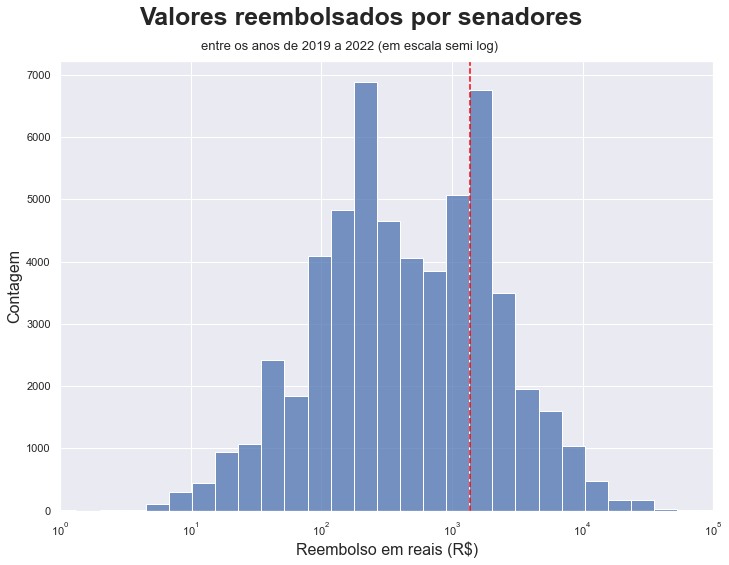

In [7]:
### Gráfico desenvolvido em parceria com Luxirio e ArturCGS
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)}) #aumentar o tamanho do output do gráfico
hist_valor = sns.histplot(data = ceaps, x = "VALOR_REEMBOLSADO", log_scale = True, bins = 40)
hist_valor.text(x = 4, y = 7800, s ="Valores reembolsados por senadores", fontsize = 25, weight = "bold")
hist_valor.text(x = 12, y = 7400, s ="entre os anos de 2019 a 2022 (em escala semi log)", fontsize = 13)
hist_valor.set(xlim=(1,100000))
plt.xlabel( "Reembolso em reais (R$)", fontsize = 16)
plt.ylabel( "Contagem", fontsize = 16)
plt.axvline(ceaps["VALOR_REEMBOLSADO"].mean(), 0,1, color = "red", linestyle="--")